<a href="https://colab.research.google.com/github/dongchimi12/KKJ/blob/main/%EC%B5%9C%EC%A2%85%20%EC%99%84%EB%B2%BD%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EB%A7%81%20%EB%84%88%EB%AC%B4%20%EC%A2%8B%EC%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import font_manager, rc
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
plt.rc('font', family='NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/drive')   ## 링크 클릭해서 구글 로그인 한후에 드라이브에 데이터 넣고 [3]에 파일 이름만 바꿔주면 됨

Mounted at /content/drive


In [4]:
test = pd.read_csv('/content/drive/My Drive/contest/test.csv') ## 파일 test에 저장

In [5]:
test.head(5) ## 위에서 5행까지 출력 test용

,city,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,1041,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,536,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,355,74,73904,306625,111,84,774,19468.34722,3
3,강서구,747,70,257494,582950,179,175,745,36675.50926,10
4,관악구,538,75,115329,503171,108,113,998,32421.76042,4


In [6]:
test.info()
test.columns ## 행수 count , datatype
test.isnull().sum() ## 빈칸 찾기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         25 non-null     object 
 1   s_p_count    25 non-null     int64  
 2   e_count      25 non-null     int64  
 3   w_count      25 non-null     int64  
 4   people       25 non-null     int64  
 5   old          25 non-null     int64  
 6   park         25 non-null     int64  
 7   mart         25 non-null     int64  
 8   m_count      25 non-null     float64
 9   train_count  25 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.1+ KB


city           0
s_p_count      0
e_count        0
w_count        0
people         0
old            0
park           0
mart           0
m_count        0
train_count    0
dtype: int64

In [7]:
df = pd.DataFrame(test) ## pandas 이용 dataframe 생성
df

,city,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
0,강남구,1041,73,698840,537024,76,162,1568,49755.42593,17
1,강동구,536,68,141770,469356,53,125,1130,27327.69444,11
2,강북구,355,74,73904,306625,111,84,774,19468.34722,3
3,강서구,747,70,257494,582950,179,175,745,36675.50926,10
4,관악구,538,75,115329,503171,108,113,998,32421.76042,4
5,광진구,463,74,126305,355662,152,63,580,23538.24421,11
6,구로구,641,77,225668,425573,142,108,664,29573.02778,8
7,금천구,393,67,242686,244535,190,55,973,18836.52083,1
8,노원구,615,66,116684,520615,117,188,529,32596.36690,13
9,도봉구,372,74,72939,322745,149,80,539,19826.32986,3


In [8]:
corr = df.corr(method = 'pearson') ## 상관계수 분석 (전체)
corr

,s_p_count,e_count,w_count,people,old,park,mart,m_count,train_count
s_p_count,1.000000,0.076353,0.692487,0.734948,-0.355111,0.702304,-0.214954,0.922061,0.302740
e_count,0.076353,1.000000,0.069948,-0.135966,-0.110169,-0.073430,-0.085598,-0.020919,-0.215196
w_count,0.692487,0.069948,1.000000,0.133788,-0.158262,0.349522,0.315232,0.615844,0.556157
people,0.734948,-0.135966,0.133788,1.000000,-0.433861,0.723426,-0.571025,0.850602,0.095311
old,-0.355111,-0.110169,-0.158262,-0.433861,1.000000,-0.297652,0.218623,-0.422811,-0.149206
park,0.702304,-0.073430,0.349522,0.723426,-0.297652,1.000000,-0.263856,0.751372,0.363615
mart,-0.214954,-0.085598,0.315232,-0.571025,0.218623,-0.263856,1.000000,-0.292155,0.525210
m_count,0.922061,-0.020919,0.615844,0.850602,-0.422811,0.751372,-0.292155,1.000000,0.356152
train_count,0.302740,-0.215196,0.556157,0.095311,-0.149206,0.363615,0.525210,0.356152,1.000000


In [10]:
test_data = df[['s_p_count', 'm_count', 'people']]

In [12]:
tdf = df[['s_p_count', 'people','m_count']] ## 열 추출해서 가공
tdf

,s_p_count,people,m_count
0,1041,537024,49755.42593
1,536,469356,27327.69444
2,355,306625,19468.34722
3,747,582950,36675.50926
4,538,503171,32421.76042
5,463,355662,23538.24421
6,641,425573,29573.02778
7,393,244535,18836.52083
8,615,520615,32596.36690
9,372,322745,19826.32986


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


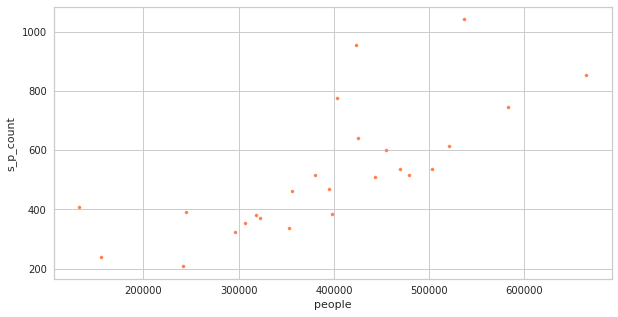

In [13]:
tdf.plot(kind='scatter', x='people', y='s_p_count',  c='coral', s=10, figsize=(10, 5))
plt.show()

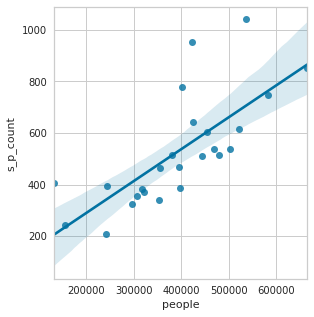

In [14]:
fig = plt.figure(figsize=(10, 5))  
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='people', y='s_p_count', data=tdf, ax=ax1)                 # 회귀선 표시
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


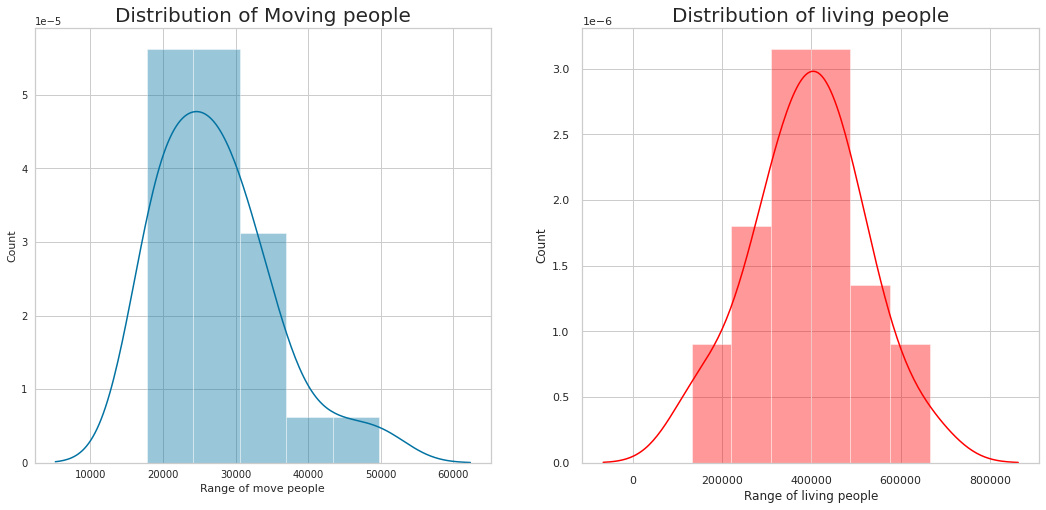

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(test_data['m_count'])
plt.title('Distribution of Moving people', fontsize = 20)
plt.xlabel('Range of move people')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(test_data['people'], color = 'red')
plt.title('Distribution of living people', fontsize = 20)
plt.xlabel('Range of living people')
plt.ylabel('Count')
plt.show()

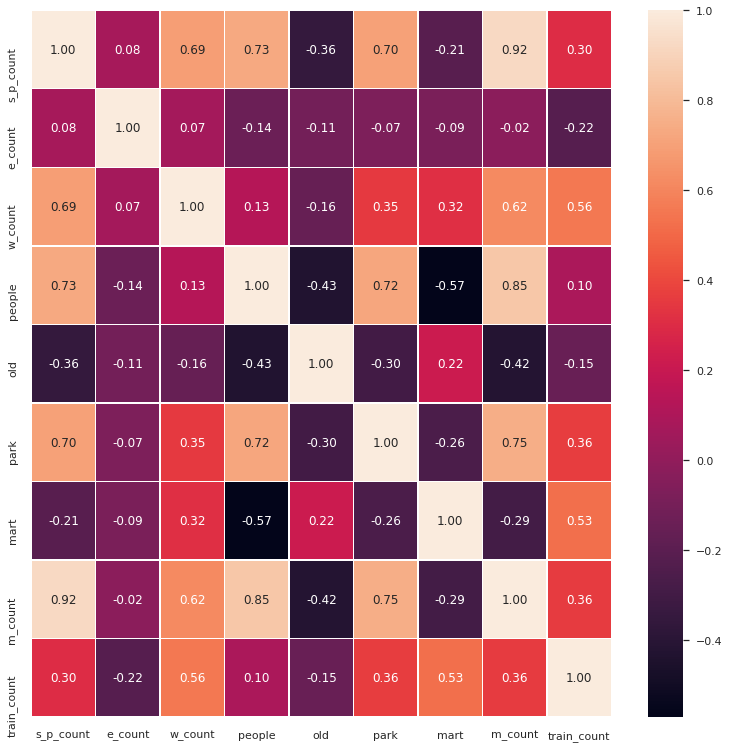

In [16]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

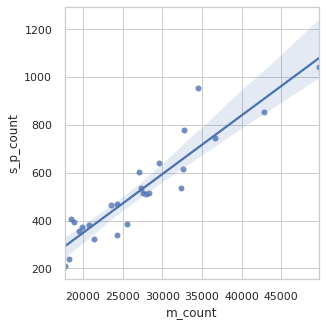

In [18]:
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
sns.regplot(x='m_count', y='s_p_count', data=test)                 # 회귀선 표시
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


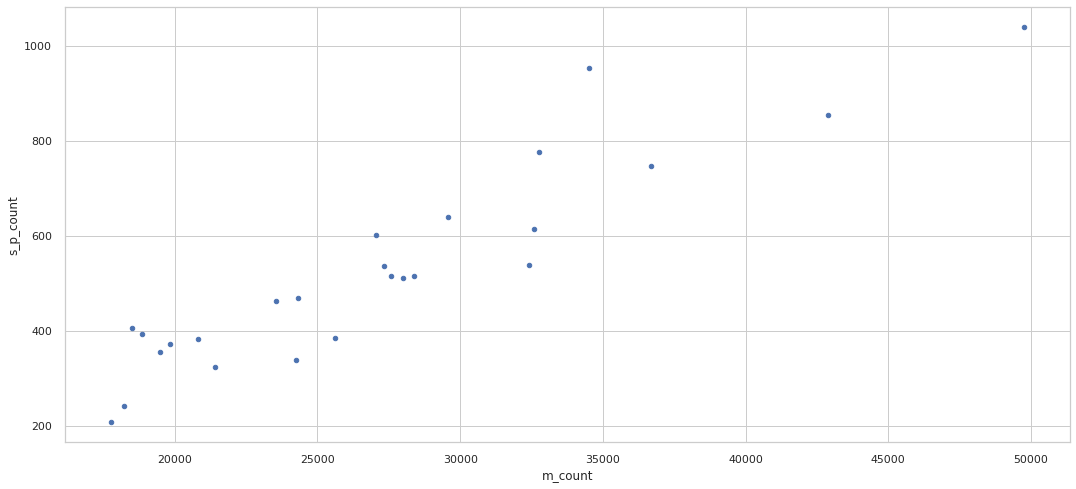

In [20]:
test.plot(kind = 'scatter', x = 'm_count', y = 's_p_count',)

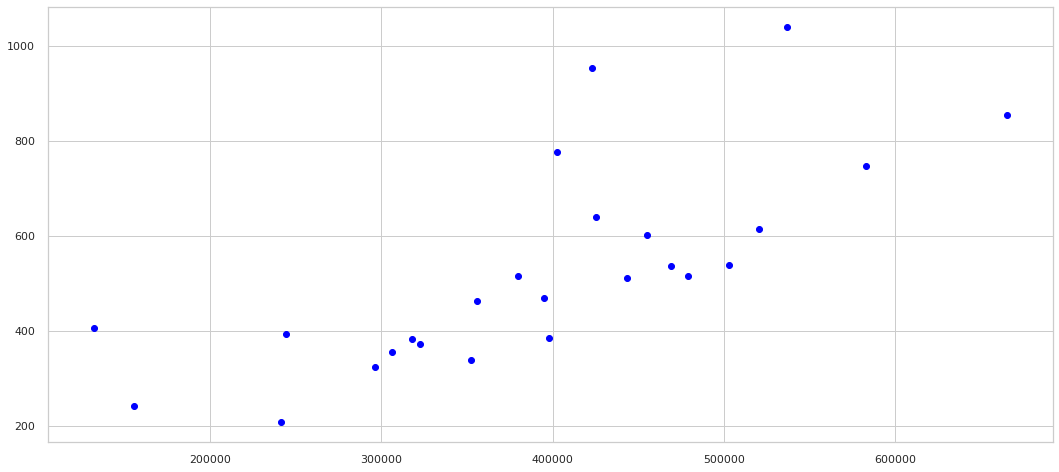

In [22]:
plt.scatter(x=tdf['people'], y=tdf['s_p_count'], c='blue')

In [23]:
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

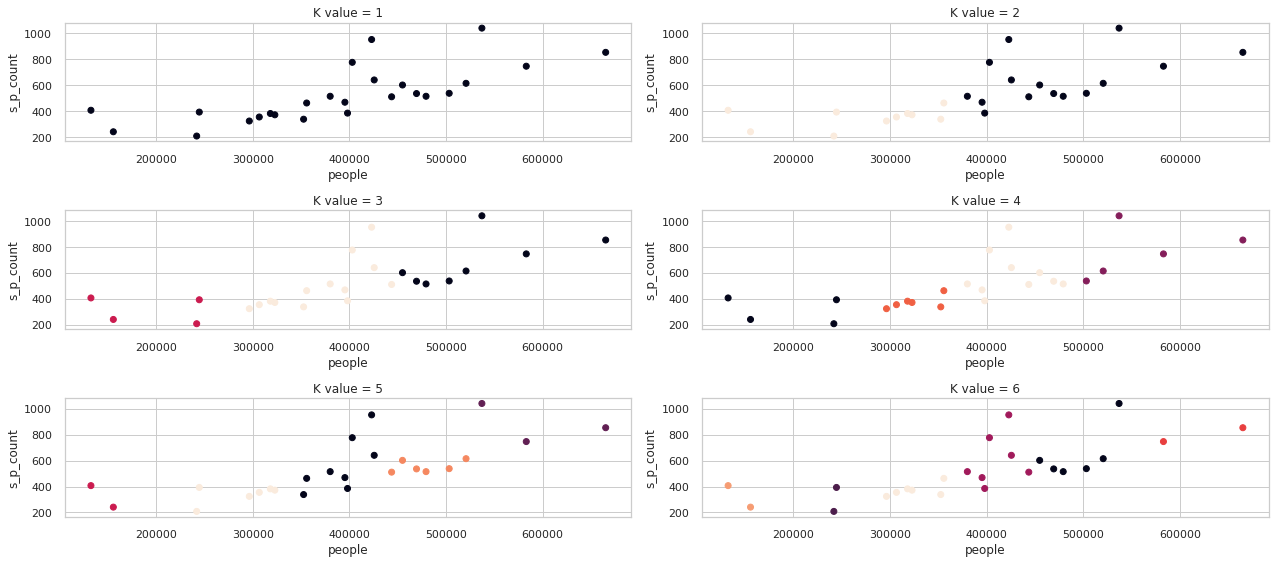

In [27]:
for i in range(1, 7):
    estimator = KMeans(n_clusters = i)
    idx = estimator.fit_predict(test_data[['people', 's_p_count']])
       # 2행 3열을 가진 서브플롯 추가 (인덱스 = i) 
    plt.subplot(3, 2, i)
    plt.tight_layout()
        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('people')
    plt.ylabel('s_p_count')
        # 클러스터링 그리기
    plt.scatter(test_data['people'], test_data['s_p_count'], c=idx)  
plt.show()

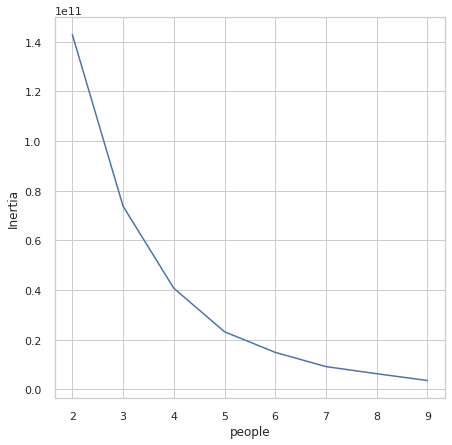

In [28]:
inertia_list = []
k_list = range(2,10)
for k in k_list:
  model = KMeans(n_clusters = k)
  model.fit(test_data)
  inertia_list.append(model.inertia_)

plt.figure(figsize = (7,7))
plt.plot(k_list, inertia_list)
plt.xlabel("people")
plt.ylabel('Inertia')
plt.show()

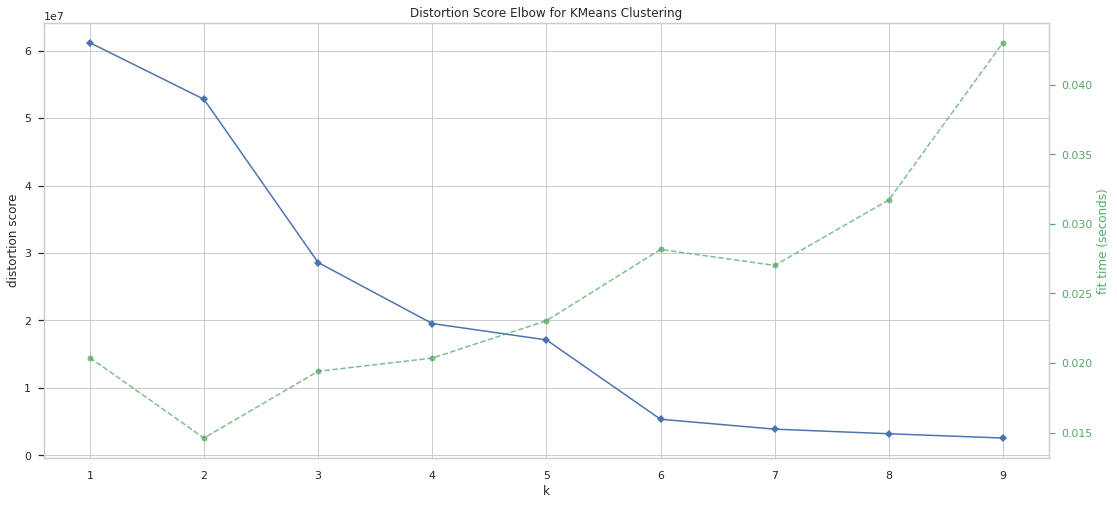

In [30]:
features = test_data.iloc[:, 1:2]
target = test_data.iloc[:, 0]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()

In [31]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

array([[19354.4989875],
       [27983.391975 ],
       [49755.42593  ],
       [33792.731252 ],
       [24428.0225675],
       [42892.30093  ]])

In [32]:
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.6031046584172262


For n_clusters = 2 The average silhouette_score is : 0.5243047705373245
For n_clusters = 3 The average silhouette_score is : 0.49737928900763706
For n_clusters = 4 The average silhouette_score is : 0.5012839101009352
For n_clusters = 5 The average silhouette_score is : 0.5161671785709241
For n_clusters = 6 The average silhouette_score is : 0.5499597491619737
For n_clusters = 7 The average silhouette_score is : 0.5307740499785397
For n_clusters = 8 The average silhouette_score is : 0.5336046507988185
For n_clusters = 9 The average silhouette_score is : 0.5533317201899333
For n_clusters = 10 The average silhouette_score is : 0.5797198011665636


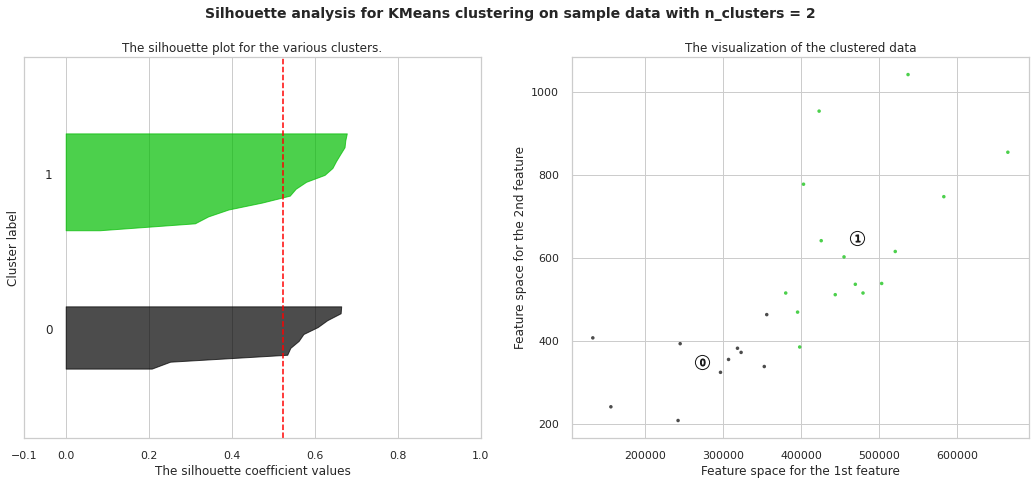

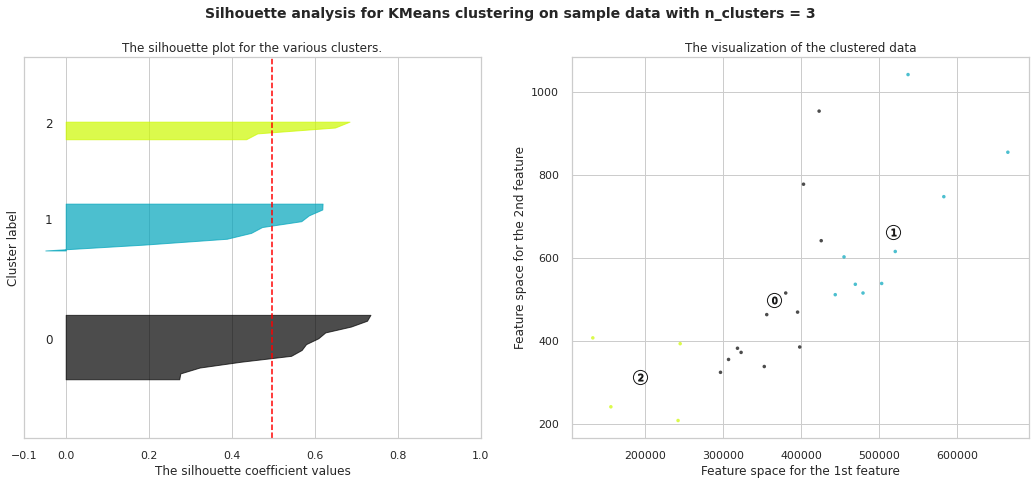

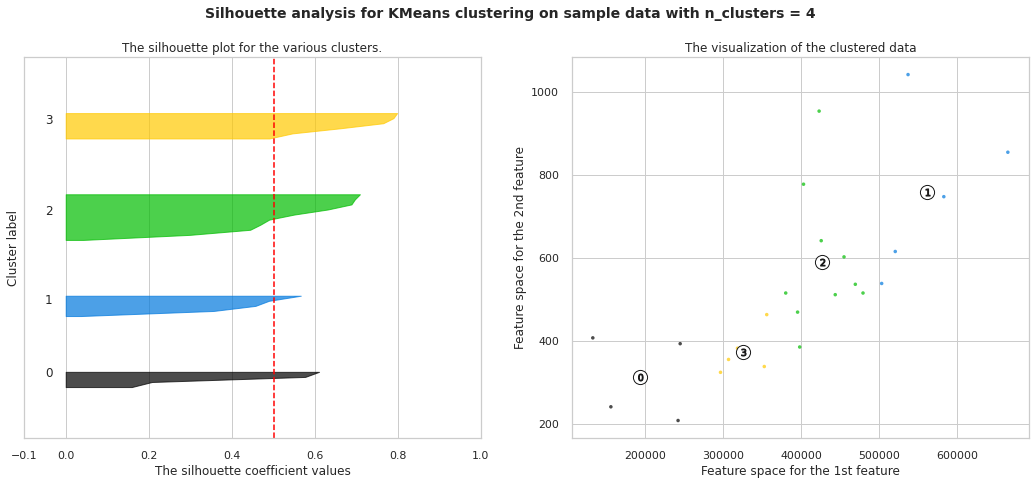

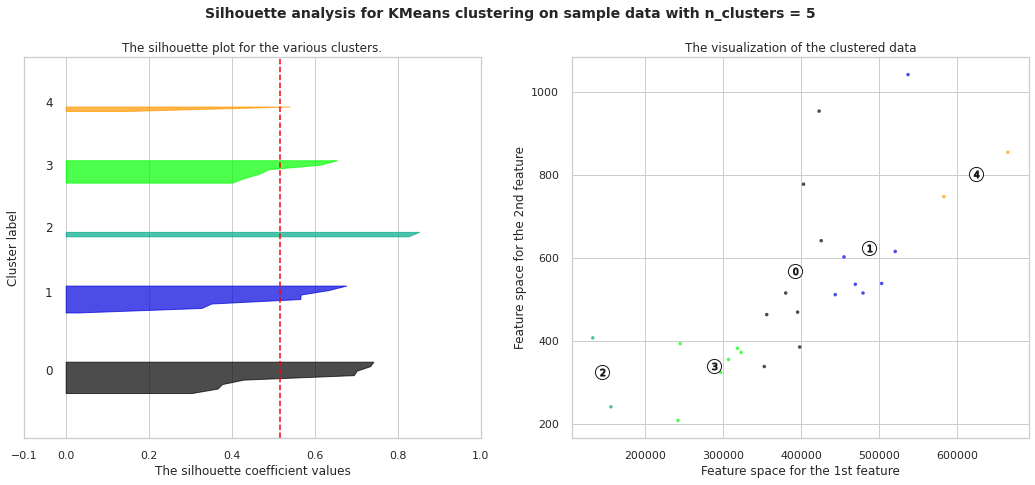

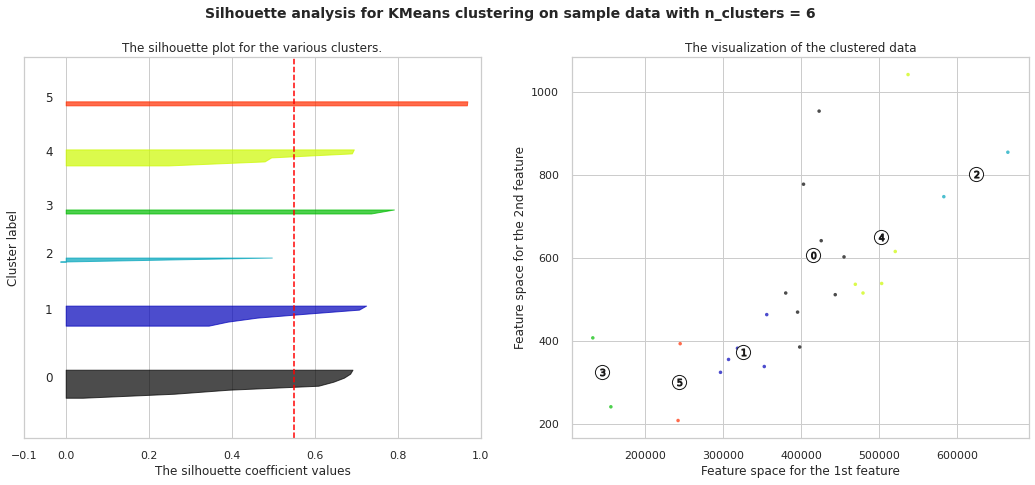

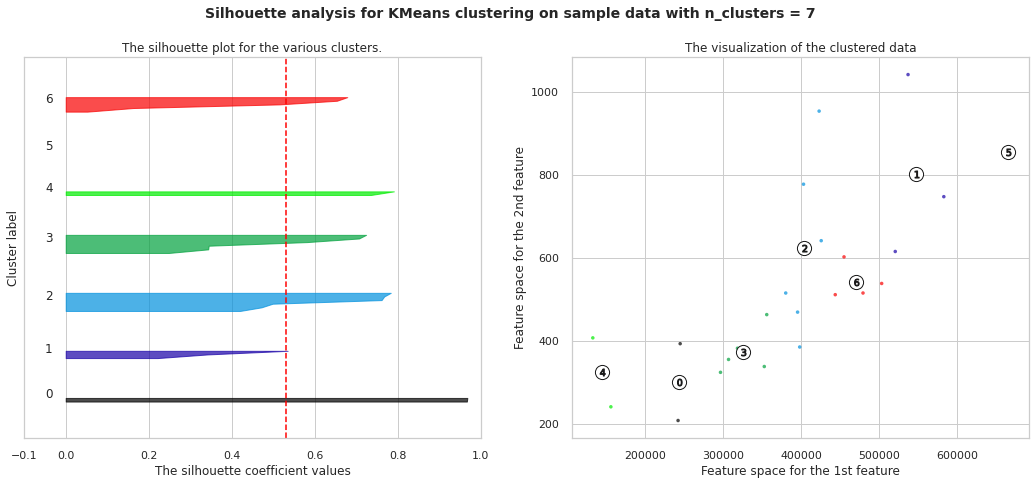

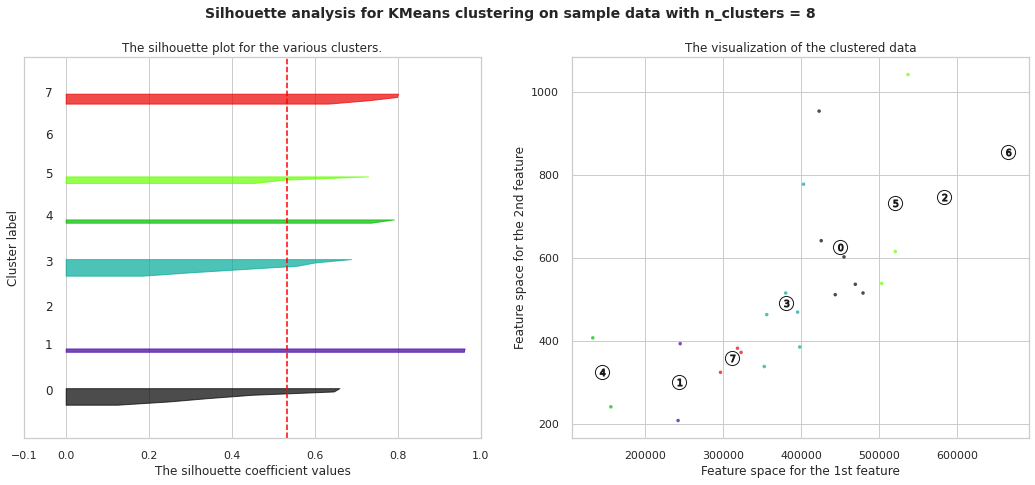

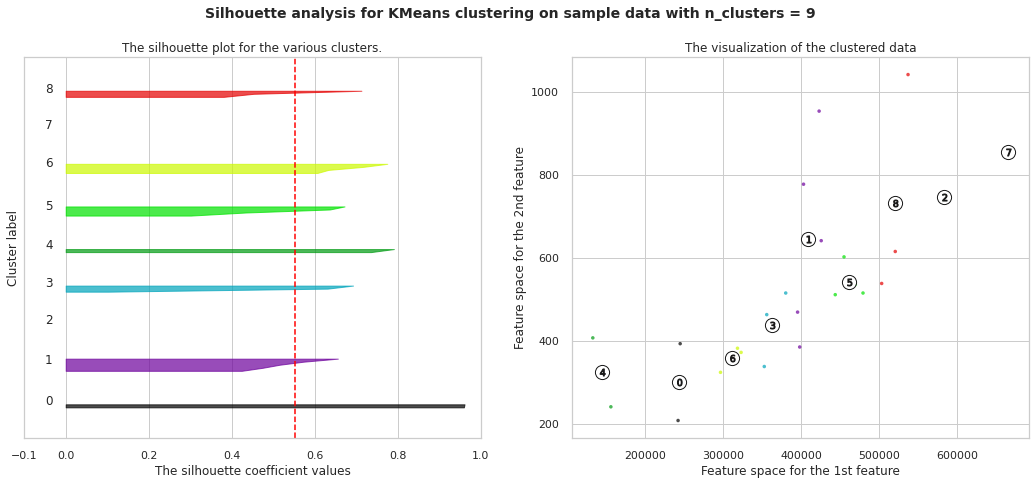

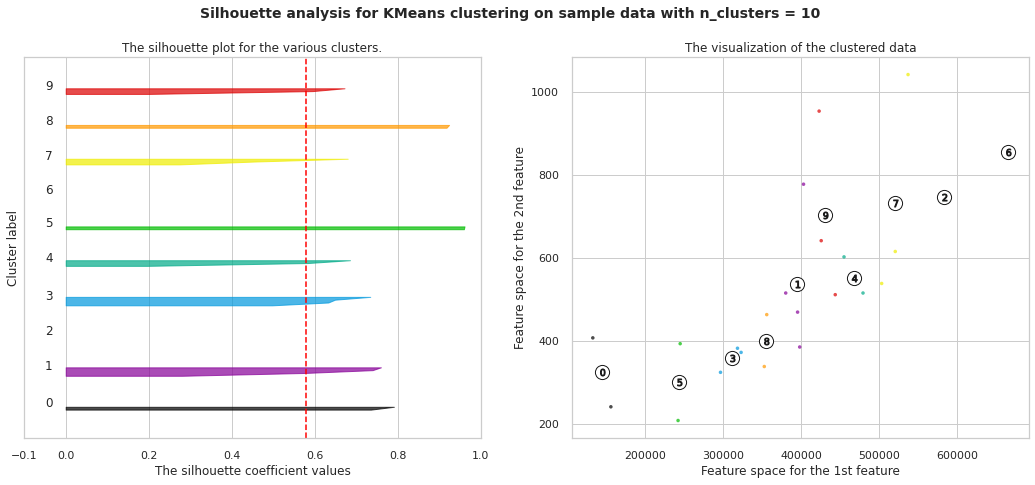

In [35]:
test_data = df[['s_p_count', 'm_count', 'people']]
test1 = test_data[['people', 's_p_count']]
test2 = test_data[['m_count', 's_p_count']]
x = test1.iloc[:,[0,1]].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [36]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity = purity_score(target, cluster_labels)
print ('Purity for the above clutering = ', purity)

Purity for the above clutering =  0.4


In [38]:
estimator = KMeans(n_clusters = 6)

In [39]:
cluster_idx = estimator.fit_predict(test_data[['people', 'm_count']])

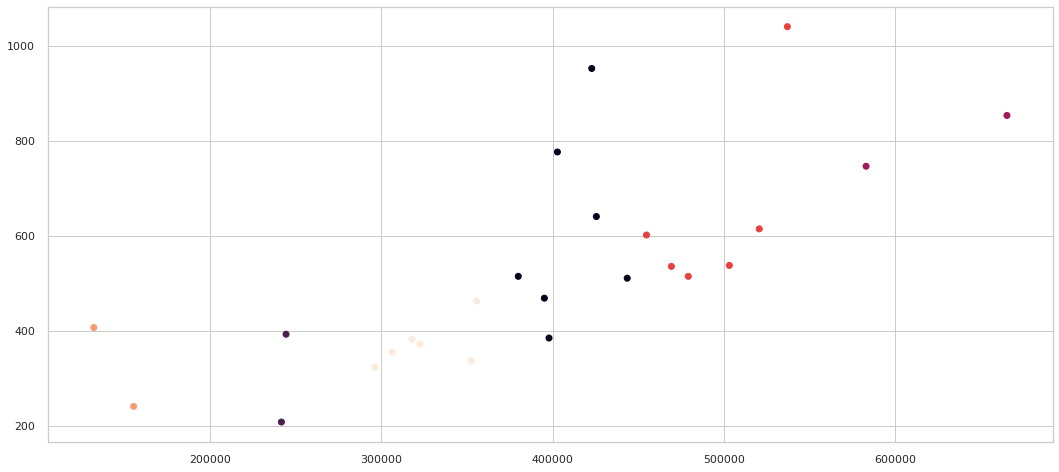

In [41]:
plt.scatter(test_data['people'], test_data['s_p_count'], c=cluster_idx)

In [47]:
test_data2 = test_data[['people', 's_p_count', 'm_count']]
x = test_data2.iloc[:, [0, 1]].values

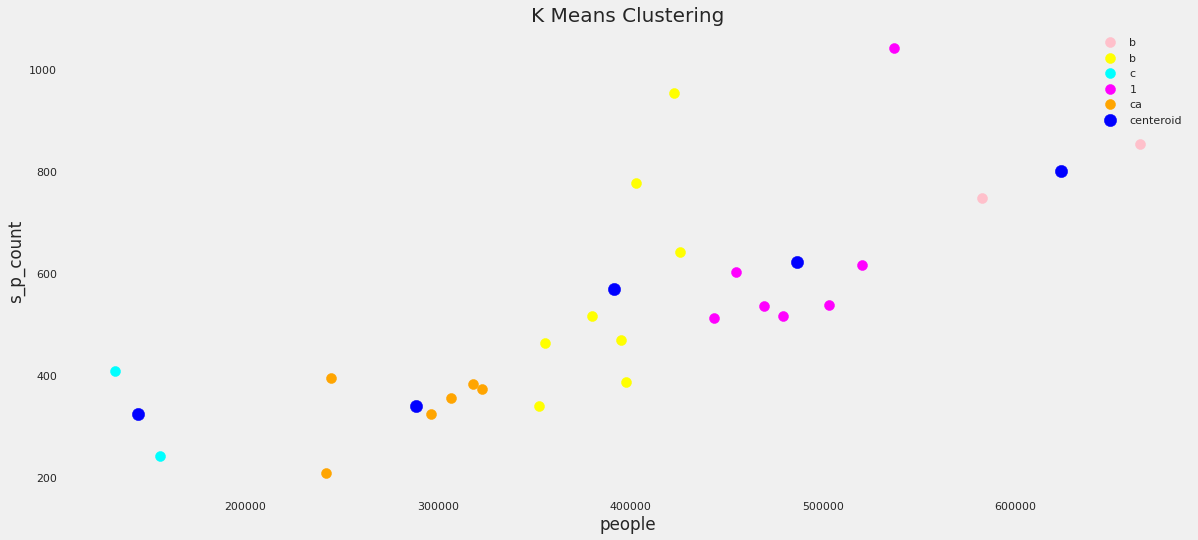

In [48]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'b')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'b')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'c')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = '1')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'ca')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 150, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('people')
plt.ylabel('s_p_count')
plt.legend()
plt.grid()
plt.show() # >> 여기서 순위를 분류하는데 인수와 운동센터 개수의 평균 이하를 앞순위로 배치할 예정